## *Assumed_Problem :- There is a mall owner about to start a sell of expensive brands and wants to send messages to customers to make them aware.He wants to know the customers, where messeges should be sent because for sending messages he will have to incur cost as well.

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data set
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,Male,19,15,39,NaN,NaN,NaN,NaN,NaN
1,2,Male,21,15,81,NaN,NaN,NaN,NaN,NaN
2,3,Female,20,16,6,NaN,NaN,NaN,NaN,NaN
3,4,Female,23,16,77,NaN,NaN,NaN,NaN,NaN
4,5,Female,31,17,40,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(200, 10)

In [5]:
data.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Annual Income (k$)          0
Spending Score (1-100)      0
Unnamed: 5                200
Unnamed: 6                200
Unnamed: 7                200
Unnamed: 8                200
Unnamed: 9                200
dtype: int64

In [6]:
# deleting columns which is unnammed and have no records

data.drop(["Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9"],axis = 1,inplace = True)

In [7]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
172,173,Male,36,87,10
163,164,Female,31,81,93
3,4,Female,23,16,77
161,162,Female,29,79,83
2,3,Female,20,16,6


In [8]:
data.shape

(200, 5)

In [9]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


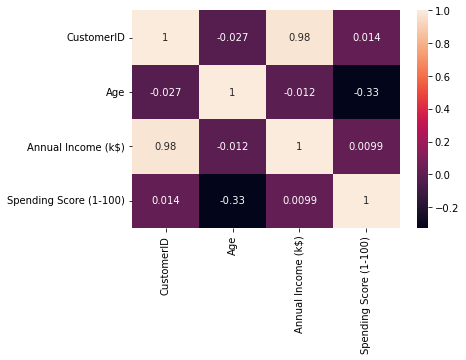

In [11]:
sns.heatmap(data.corr(),annot = True);

# EDA

In [12]:
data["Gender"].value_counts().values

array([112,  88], dtype=int64)

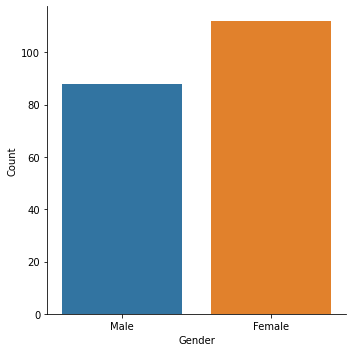

In [13]:
sns.catplot(data = data, x = "Gender",kind = "count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



## Observation:- Count of female is graeter then male that means female spent more then male.

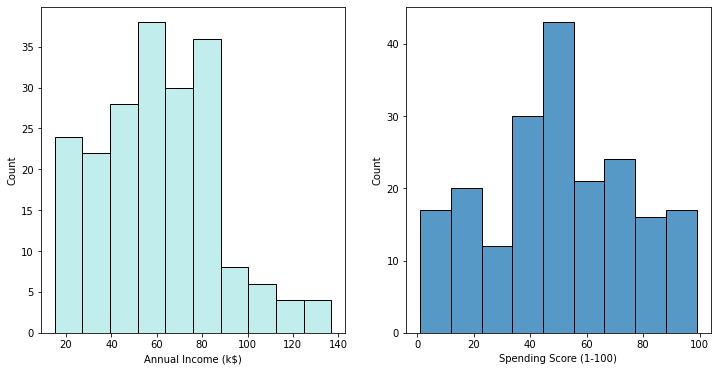

In [14]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data["Annual Income (k$)"],color = "#ace8e6");
plt.subplot(1,2,2)
sns.histplot(data["Spending Score (1-100)"]);

 ## Most of the customer's annnual income is between 5(K doller) to 90(K doller) and spending score is between 40 to 80.

In [15]:
a = data.groupby("Age").agg({"Annual Income (k$)":"sum"}).reset_index()
a

,Age,Annual Income (k$)
0,18,205
1,19,456
2,20,208
3,21,194
4,22,94
5,23,249
6,24,157
7,25,173
8,26,116
9,27,379


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


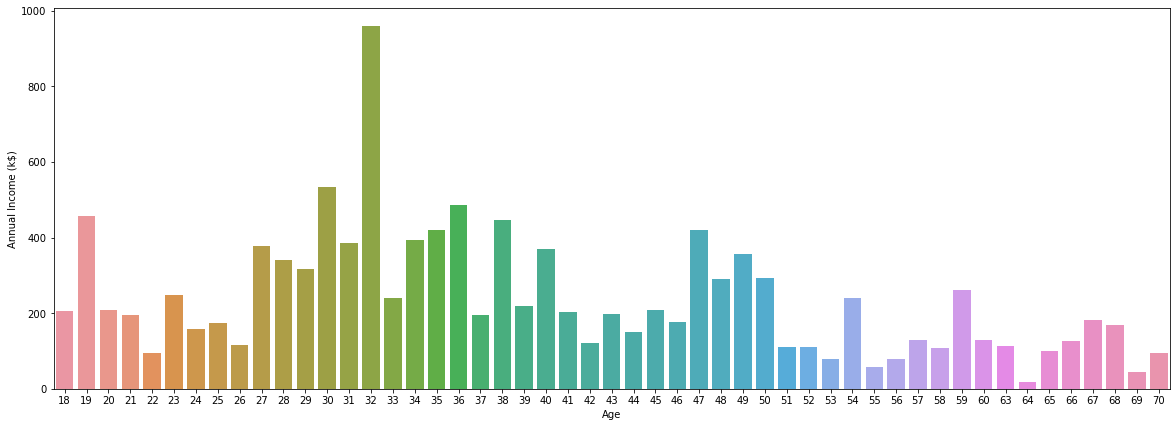

In [16]:
plt.figure(figsize = (20,7))
sns.barplot("Age","Annual Income (k$)",data = a);

## Obseravation - Sum of annual income of age 32 are higher.

In [17]:
b = data.groupby("Age").agg({"Spending Score (1-100)":"sum"}).reset_index()
b

,Age,Spending Score (1-100)
0,18,240
1,19,318
2,20,201
3,21,334
4,22,210
5,23,380
6,24,286
7,25,119
8,26,109
9,27,362


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


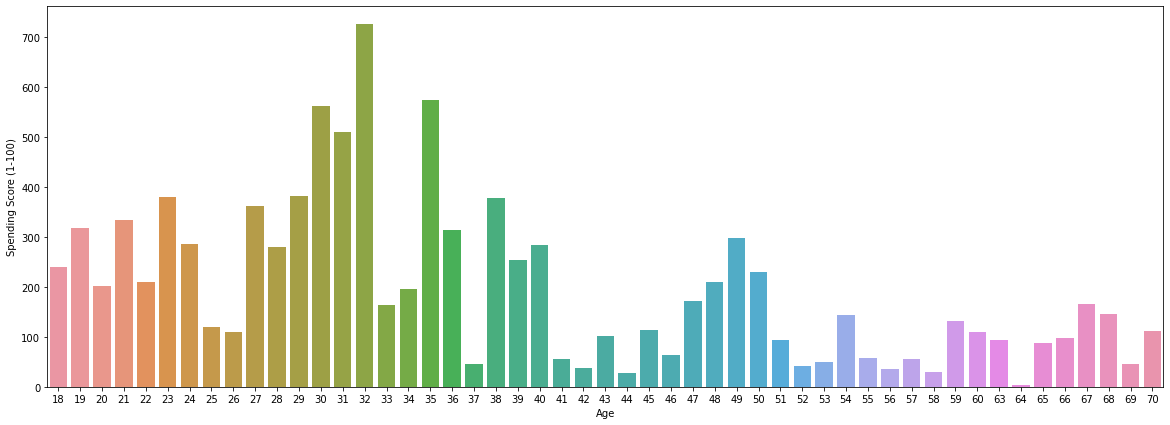

In [18]:
plt.figure(figsize = (20,7))
sns.barplot("Age","Spending Score (1-100)",data = b);

## Obsrvation:- Sum of spending scores are good between age 27 to 38

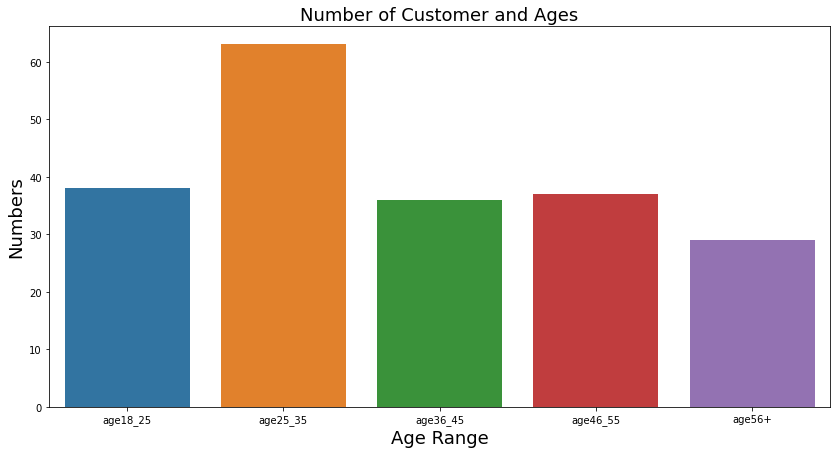

In [19]:
age18_25 = data["Age"][(data["Age"]>=18) & (data["Age"]<=25)]
age25_35 = data["Age"][(data["Age"]>=25) & (data["Age"]<=35)]
age36_45 = data["Age"][(data["Age"]>=36) & (data["Age"]<=45)]
age46_55 = data["Age"][(data["Age"]>=46) & (data["Age"]<=55)]
age56plus = data["Age"][(data["Age"]>=56)] 

agex = ["age18_25","age25_35","age36_45","age46_55","age56+"]
agey = [len(age18_25.values),len(age25_35.values),len(age36_45.values),len(age46_55.values),len(age56plus.values)]

plt.figure(figsize = (14,7))
sns.barplot(x = agex,y = agey)
plt.xlabel("Age Range",fontsize = 18 )
plt.ylabel("Numbers",fontsize = 18)
plt.title("Number of Customer and Ages",fontsize = 18);

## Observation - most of customers are from range age 25 - 35

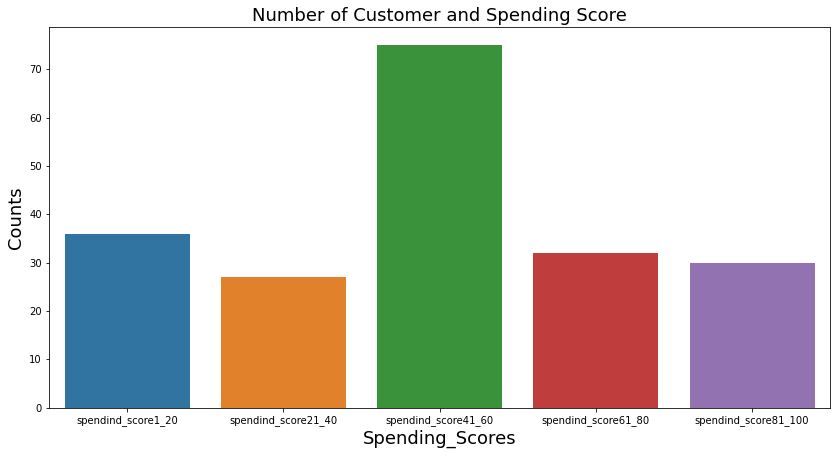

In [20]:
spendind_score1_20 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=1) & (data['Spending Score (1-100)']<=20)]
spendind_score21_40 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=21) & (data['Spending Score (1-100)']<=40)]
spendind_score41_60 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=41) & (data['Spending Score (1-100)']<=60)]
spendind_score61_80 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=61) & (data['Spending Score (1-100)']<=80)]
spendind_score81_100 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=81) & (data['Spending Score (1-100)']<=100)]

spending_scorex = ["spendind_score1_20","spendind_score21_40","spendind_score41_60","spendind_score61_80","spendind_score81_100"]
spending_scorey = [len(spendind_score1_20.values),len(spendind_score21_40.values),len(spendind_score41_60.values),len(spendind_score61_80.values),len(spendind_score81_100.values)]

plt.figure(figsize = (14,7))
sns.barplot(x = spending_scorex,y = spending_scorey)
plt.xlabel("Spending_Scores",fontsize = 18)
plt.ylabel("Counts",fontsize =18)
plt.title("Number of Customer and Spending Score",fontsize =18);

## Observation :- Most of the spending scores are between 41 to 60

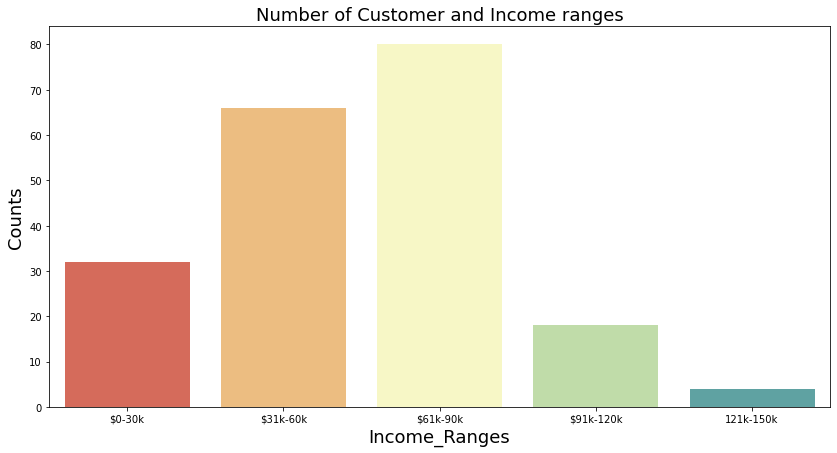

In [21]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=0) & (data["Annual Income (k$)"]<=30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=31) & (data["Annual Income (k$)"]<=60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=61) & (data["Annual Income (k$)"]<=90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=91) & (data["Annual Income (k$)"]<=120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=121) & (data["Annual Income (k$)"]<=150)]

aix = ["$0-30k","$31k-60k","$61k-90k","$91k-120k","121k-150k"]
aiy = [len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

plt.figure(figsize = (14,7))
sns.barplot(x=aix,y=aiy,palette = "Spectral")
plt.xlabel("Income_Ranges",fontsize = 18)
plt.ylabel("Counts",fontsize = 18)
plt.title("Number of Customer and Income ranges",fontsize =18);


## Observation : - Most of the customers income range is $61k-90k

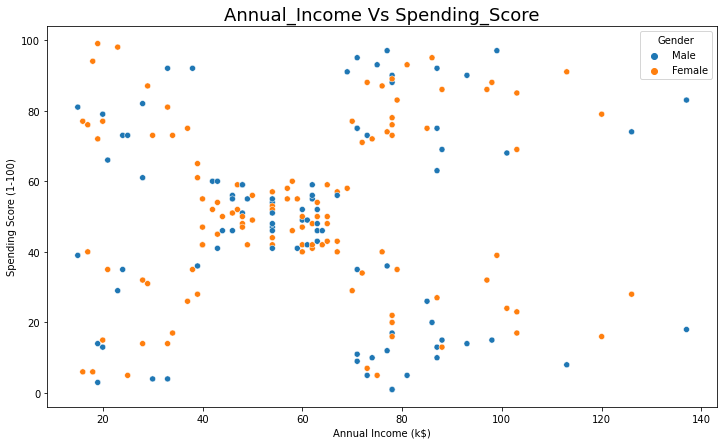

In [22]:
# Checking relation between annnal income and spending score
plt.figure(figsize = (12,7))
sns.scatterplot(x = data["Annual Income (k$)"],y = data["Spending Score (1-100)"],hue = data["Gender"] )
plt.title("Annual_Income Vs Spending_Score", fontsize = 18);

# 

# Model Building

In [23]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
# Feature Selection
data1 = data.iloc[:,3:5].values

In [59]:
data1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [60]:
# Checking best cluster number
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(data1)
    wcss.append(km.inertia_)
wcss

C:\Users\sony\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25063.652515864094,
 22143.222100767438,
 19634.554629349972]

Text(0, 0.5, 'WCSS')

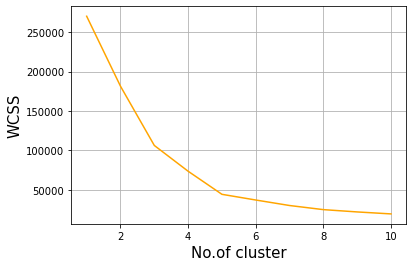

In [61]:
plt.plot(range(1,11),wcss,color = "orange")
plt.grid()
plt.xlabel("No.of cluster",fontsize = 15)
plt.ylabel("WCSS",fontsize = 15)

In [62]:
km = KMeans(n_clusters = 5)
segment = km.fit_predict(data1)

In [63]:
segment

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [64]:
data1[segment == 0,1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

Text(0, 0.5, 'Spending Score')

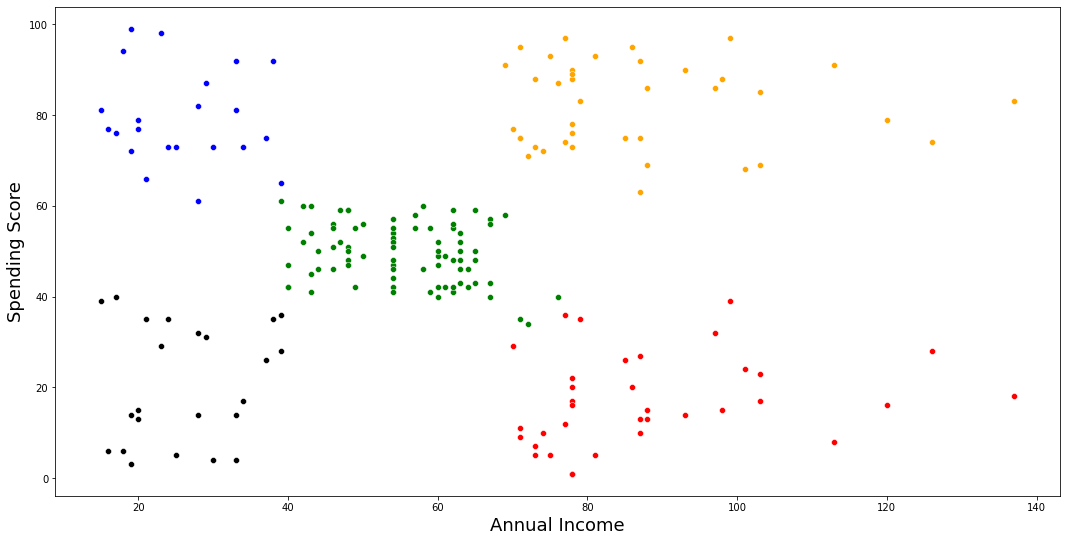

In [69]:
#plotting 2d only for best understanding
plt.figure(figsize = (18,9))
sns.scatterplot(data1[segment==0,0],data1[segment==0,1],color = "red")
sns.scatterplot(data1[segment==1,0],data1[segment==1,1],color = "blue")
sns.scatterplot(data1[segment==2,0],data1[segment==2,1],color = "orange")
sns.scatterplot(data1[segment==3,0],data1[segment==3,1],color = "green")
sns.scatterplot(data1[segment==4,0],data1[segment==4,1],color = "black")
plt.xlabel("Annual Income",fontsize = 18)
plt.ylabel("Spending Score",fontsize =18)


# Solution - Data points which are highlighted with red colour,their annual income is more but their spending score is not good,these all are exist in cluster number [0]



# Data points which are highlighted with orange colour,their annual income in good as well as their spending scores are also good,these all are exist in cluster number[2]

In [66]:
data["Segment"] = segment

In [72]:
imp_for_sale = data[data["Segment"]==2].sample(5)

In [73]:
imp_for_sale.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
197,198,Male,32,126,74,2
191,192,Female,32,103,69,2
157,158,Female,30,78,78,2
151,152,Male,39,78,88,2
145,146,Male,28,77,97,2


In [71]:
data[data["Segment"]==0].shape

(35, 6)

# Now we have data of customers where messages should be sent 